In [ ]:
import numpy as np
import matplotlib.pyplot as plt
loaded = np.load("endeavour.npz")
task1 = loaded["task1"]
task2 = loaded["task2"]
task3 = loaded["task3"]
task4 = loaded["task4"]
task6a = loaded["task6a"]
task6b = loaded["task6b"]
task7a = loaded["task7a"]
task7b = loaded["task7b"]
for k in loaded.keys():
    print(f"key {k} has shape: {loaded[k].shape}")


key task1 has shape: (25, 18, 18)
key task2 has shape: (100, 1296)
key task3 has shape: (1000, 1089)
key task4 has shape: (1000, 2500)
key task6a has shape: (1556153,)
key task6b has shape: (1556153,)
key task7a has shape: (2737941,)
key task7b has shape: (2737941,)


No of images rotated   0 degrees: 6
No of images rotated  90 degrees: 10
No of images rotated 180 degrees: 6
No of images rotated 270 degrees: 3


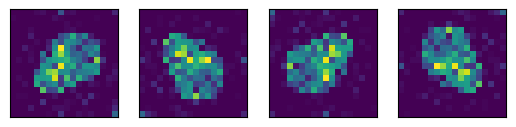

In [ ]:
#task 1
x=task1[0]

#rotating function, returns all 4 rotations
def rotate(x):
    rotations = []
    for i in range(4):
        x2 = np.rot90(x,k=i,axes=(1,0))
        rotations.append(x2)
    rotations = np.array(rotations)
    return rotations

#task a
#display all 4 rotations
f,ax=plt.subplots(1,4)
r=rotate(x)
for i in range(4):
    ax[i].imshow(r[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

#task b
#count number of patterns in each orientation
count = [0]*4
rots = rotate(x)
for i in range(25):
    arr = task1[i]
    for j in range(4):
        if np.array_equal(rots[j], arr):
            count[j]+=1
for i in range(4):
    print(f"No of images rotated {i*90:3} degrees:",count[i])


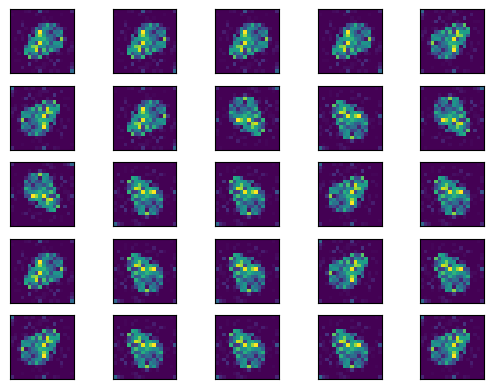

In [ ]:
# Display all images to verify answer by visual inspection
f, ax = plt.subplots(5, 5)

for i in range(25):
    ax[i//5, i%5].imshow(task1[i])
    ax[i//5, i%5].set_xticks([])
    ax[i//5, i%5].set_yticks([])

No of images rotated   0 degrees: 22
No of images rotated  90 degrees: 32
No of images rotated 180 degrees: 21
No of images rotated 270 degrees: 25


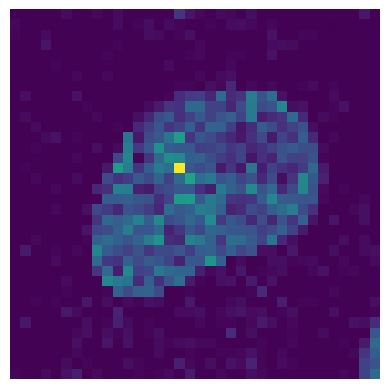

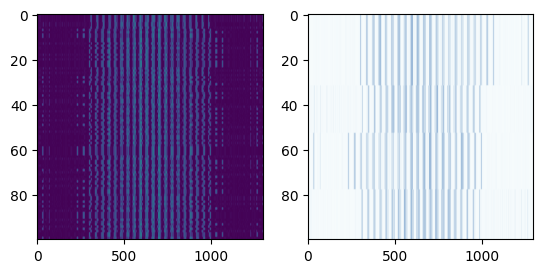

In [ ]:
#task 2

#task a
#display master image
task2_ref = task2[0].reshape(36,36)
plt.imshow(task2_ref)
plt.axis('off')

#task b
#count number of patterns in each orientation
count = [0]*4
rots = rotate(task2_ref)
for i in range(100):
    arr = task2[i].reshape(36,36)
    for j in range(4):
        if np.array_equal(rots[j], arr):
            count[j]+=1
for i in range(4):
    print(f"No of images rotated {i*90:3} degrees:",count[i])

#sorting the flattened array
f,ax = plt.subplots(1,2)
ax[0].imshow(task2,aspect =36**2/100)

s = np.lexsort(task2.T)
sorted_array = task2[s]
ax[1].imshow(sorted_array,aspect =36**2/100,cmap="BuPu")


No of images rotated   0 degrees: 254
No of images rotated  90 degrees: 236
No of images rotated 180 degrees: 250
No of images rotated 270 degrees: 260


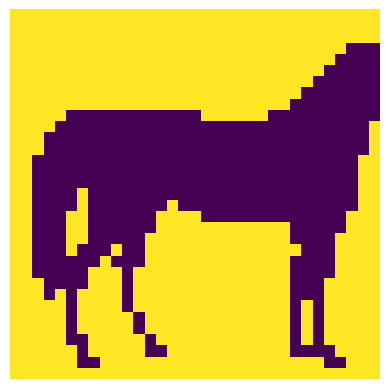

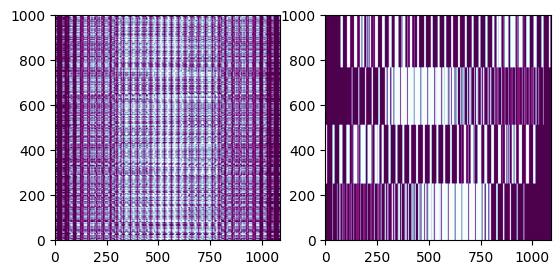

In [ ]:
#task 3

#task a
#render master image
task3_ref = task3[0].reshape(33,33)
plt.imshow(task3_ref)
plt.axis('off')

#task b
#count number of patterns in each orientation
count = [0]*4
rots = rotate(task3_ref)
for i in range(1000):
    arr = task3[i].reshape(33,33)
    for j in range(4):
        if np.array_equal(rots[j], arr):
            count[j]+=1
for i in range(4):
    print(f"No of images rotated {i*90:3} degrees:",count[i])

#task c
#sorting matrix
f,ax = plt.subplots(1,2)
ax[0].imshow(task3,aspect =33**2/1000,cmap = 'BuPu',extent=[0,1089,0,1000])

s = np.lexsort(task3.T)
sorted_array = task3[s]
ax[1].imshow(sorted_array,aspect =33**2/1000,cmap = 'BuPu',extent=[0,1089,0,1000])


Average total pixel value: 1251.047


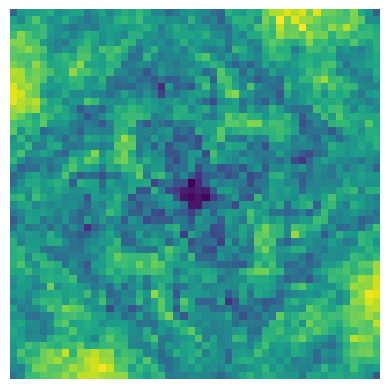

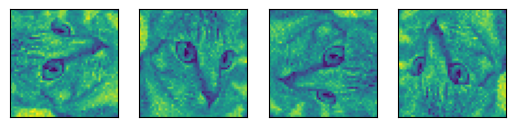

In [ ]:
#task 4
from sklearn.cluster import KMeans

#task a
#average total pixel value
total=0
for i in range(1000):
    total += sum(task4[i])
print("Average total pixel value:", total/1000)

#task b
#average 2d pattern
avg_img=np.mean(task4,axis=0).reshape(50,50)
plt.imshow(avg_img)
plt.axis('off')

#task c
#cluster into 4 groups using KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0,n_init=100).fit(task4)
cluster_labels = kmeans.labels_

#group the respective images to their cluster label
f,ax = plt.subplots(1,4)
groups=[[],[],[],[]]
for i in range(1000):
    group = cluster_labels[i]
    groups[group].append(task4[i])

#display all 4 images
for i in range(4):
    group = groups[i]
    img = np.mean(np.array(group),axis=0).reshape(50,50)
    ax[i].imshow(img)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

Average total pixel value:  23.745372701609828


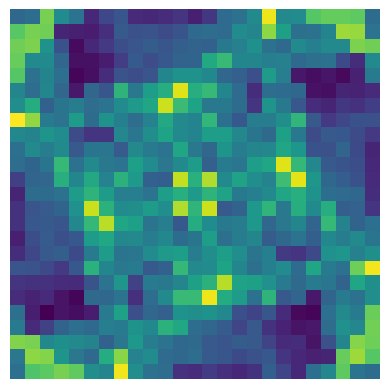

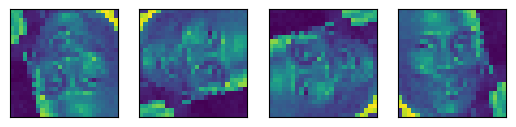

In [ ]:
#task 6

#task a
#average total pixel value per pattern
print("Average total pixel value: ", task6a.shape[0]/65535)

#task b
#render average 2d image
img=np.zeros((25,25))
for i in range(task6a.shape[0]):
    x=task6b[i]
    img[x//25,x%25]+=1
plt.imshow(img/65535)
plt.axis('off')

#task c
#form the matrix for all 65535 images
images=np.zeros((65535,625))
for i in range(task6a.shape[0]):
    x,y=task6a[i],task6b[i]
    images[x,y]=1

#cluster images by orientation using kmeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=100).fit(images)
cluster_labels = kmeans.labels_

#assign each image to their cluster group
f,ax = plt.subplots(1,4)
groups=[[],[],[],[]]
for i in range(65535):
    group = cluster_labels[i]
    groups[group].append(images[i])

#display all images
for i in range(4):
    group = groups[i]
    img = np.mean(np.array(group),axis=0).reshape(25,25)
    ax[i].imshow(img)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [ ]:
#task 7

#create design matrix with all images
images=np.zeros((100000,625))
for i in range(task7a.shape[0]):
    x,y=task7a[i],task7b[i]
    images[x,y]=1

new_images=np.zeros((400000,625))

#add all 4 rotations of each image into the dataset
for i in range(0,400000,4):
    img = images[i//4].reshape(25,25)
    rots = rotate(img)
    new_images[i]=rots[0].flatten()
    new_images[i+1]=rots[1].flatten()
    new_images[i+2]=rots[2].flatten()
    new_images[i+3]=rots[3].flatten()
images = new_images
#print(new_images.shape)

(400000,)
153305
52101
42725
151869


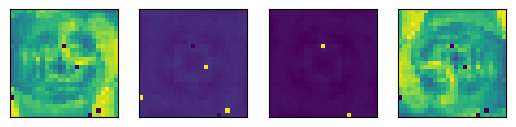

In [ ]:
n_clusters = 4

# From experimentation using a too high value of n_init does not yield much, as such a lower value is chosen for this part to segregate the data
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10,init='k-means++').fit(images)

cluster_labels = kmeans.labels_
print(cluster_labels.shape)

f,ax = plt.subplots(1,n_clusters)
new_groups=[]
for _ in range(n_clusters):
    new_groups.append([])

for i in range(images.shape[0]):
    group = cluster_labels[i]
    new_groups[group].append(images[i])

for i in range(n_clusters):
    group = new_groups[i]
    img = np.mean(np.array(group),axis=0).reshape(25,25)
    ax[i].imshow(img)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

for g in new_groups:
    print(len(g))


(305174, 625)


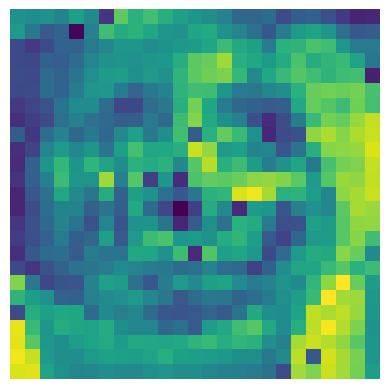

In [ ]:
# results may differ noticably from machine to machine due to random state
# From above groups 2 and 3 (0 indexing) appear to vaguely resmble a persons face with group 3 rotated 180 degress
# Rotate images from group 3 and add it to group 2 to form more accurate dataset with less noise

temp = np.zeros((len(new_groups[3]),625))
for i in range(len(new_groups[3])):
    img = new_groups[3][i].reshape(25,25)
    img = np.rot90(img,k=2,axes=(1,0))
    temp[i]=img.flatten()

images =  np.concatenate((temp, new_groups[2]), axis=0)
plt.imshow(np.mean(images,axis=0).reshape(25,25))
plt.axis('off')
print(images.shape)

(305174,)
219619
32209
34375
18971


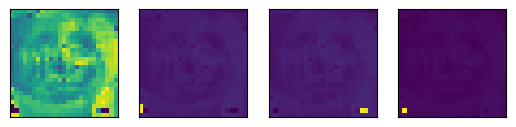

In [ ]:
n_clusters = 4


kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=100,init='k-means++').fit(images)

cluster_labels = kmeans.labels_
print(cluster_labels.shape)

f,ax = plt.subplots(1,n_clusters)
new_groups=[]
for _ in range(n_clusters):
    new_groups.append([])

for i in range(images.shape[0]):
    group = cluster_labels[i]
    new_groups[group].append(images[i])

for i in range(n_clusters):
    group = new_groups[i]
    img = np.mean(np.array(group),axis=0).reshape(25,25)
    ax[i].imshow(img)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

for g in new_groups:
    print(len(g))

